In [ ]:
# Use conda enironment called data_scores

# conda create -n data_scores -c conda-forge rasterio jupyter geojson pandas numpy 
# conda activate data_scores
# python -m ipykernel install --user --name=data_scores

In [9]:
import pandas as pd
import numpy as np
import plotly.express as px

In [104]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import Blobber
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from dateutil.parser import parse
import re
import operator
from functools import reduce

[nltk_data] Downloading package stopwords to /Users/mansi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Park Area

In [10]:
social_distancing_parks = pd.read_csv(r'/Users/mansi/Downloads/Social_Distancing__Parks_Crowds_Data.csv')
park_areas = pd.read_csv(r'/Users/mansi/Downloads/Social_Distancing__Park_Areas.csv')

In [11]:
park_areas['park_area_id'][0]

'B057-ZN04'

In [14]:
social_distancing_parks['park_area_id'][0]

'X179'

In [46]:
# confirm both columns 
social_distancing_parks['park_area_id'] = social_distancing_parks['park_area_id'].astype(str)
park_areas['park_area_id'] = park_areas['park_area_id'].astype(str)

In [49]:
sd_parks = social_distancing_parks.merge(park_areas, on=['park_area_id', 'park_borough', 'park_district'], how='left')
sd_parks['park_borough'] = sd_parks['park_borough'].str.strip()
sd_parks_bklyn = sd_parks[sd_parks['park_borough'] == 'Brooklyn']
sd_prospect = sd_parks_bklyn[sd_parks_bklyn['park_area_desc'].str.contains("Prospect")]

In [50]:
# looks like people largely follow social distancing guidelines in Prospect Park!!
sd_prospect

,encounter_timestamp,park_area_id,park_district,park_borough,patroncount,in_playground,action_taken,amenity,communityboard,gispropnum,multipolygon,park_area_desc,park_area_loc,police_boro_com,police_precinct,reported_as
621,05/05/2020 01:59:47 PM,B073-ZN08,B-19,Brooklyn,20,False,Approached the crowd; they complied with instr...,Bench/sitting area,355,B073,MULTIPOLYGON (((-73.9675091649433 40.653451884...,Prospect Park-Park Side Ave,"Peristyle, Pergola, S. Lake Dr.",Brooklyn South,78.0,B073
1245,04/05/2020 02:05:43 PM,B585,B-16,Brooklyn,10,False,Did not approach the crowd; the crowd remains,NaN,316,B585,MULTIPOLYGON (((-73.91862795748887 40.67089764...,Prospect Plaza Park,Park Pl. to Sterling Pl. bet. Howard Ave. and ...,NaN,NaN,B585


### Monuments

In [172]:
park_monuments = pd.read_csv(r'/Users/mansi/Downloads/NYC_Parks_Monuments.csv')

In [173]:
park_monuments['borough'] = park_monuments['borough'].astype(str)
park_monuments['borough'] = park_monuments['borough'].str.strip()

# filter by Brooklyn monuments
bklyn_monuments = park_monuments[park_monuments['borough'] == 'Brooklyn']

bklyn_monuments = bklyn_monuments[bklyn_monuments['parkname'].notna()]

In [174]:
# Monuments specifically in Prospect Park
prospect_monuments = bklyn_monuments[bklyn_monuments['parkname'].str.contains("Prospect")]

In [175]:
prospect_monuments.to_csv('/Users/mansi/Downloads/prospect_monuments.csv')

In [176]:
prospect_monuments.columns

Index(['name', 'fileorder', 'number', 'parkprop', 'borough', 'parkname',
       'parknumber', 'commboard', 'council', 'Location', 'extant', 'dedicated',
       'cast', 'descrip', 'dimen', 'sponsor', 'materials', 'foundry',
       'fabricator', 'sculptor', 'architect', 'donor', 'maintain',
       'contractor', 'Name2', 'Name3', 'MaintainedByParks', 'Installation',
       'Rededication', 'Cost', 'Categories', 'inscribed', 'X', 'Y'],
      dtype='object')

In [177]:
materials_col = prospect_monuments['materials'].dropna()

In [178]:
material_list = materials_col.to_list()

In [179]:
material_list = [each_string.title() for each_string in material_list]

In [180]:
material_list = [each_string.split(',') for each_string in material_list]

In [181]:
material_list = reduce(operator.concat, material_list)

In [182]:
material_list = [each_string.strip() for each_string in material_list]

In [183]:
material_list = [each_string.split(';') for each_string in material_list]

In [184]:
material_list = reduce(operator.concat, material_list)

In [185]:
material_list = [each_string.strip() for each_string in material_list]

In [186]:
material_list

['Bronze (Green Patina)',
 'Knoxville Marble (Rough)',
 'Pink Granite (Polished)',
 'Bronze',
 'Limestone',
 'Limestone',
 'Kosmocrete',
 'Limestone',
 'Bronze',
 'Limestone',
 'Bronze',
 'Bronze',
 'Barre Granite',
 'Bronze',
 'Granite',
 'Bronze',
 'Bronze',
 'Indiana Limestone',
 'Armatures--Steel',
 'Aluminum (Color-Coated)',
 'Marble',
 'Columns And Plinths--Granite',
 'Tripods And Bowls--Bronze',
 'Figures--Bronze',
 'Boulder--Basalt',
 'Play Surface--Ceramic',
 'Figure',
 'Eagle',
 'And Medallions--Bronze',
 "Pedestal--Pink Milford Granite With Steps Of Milford Granite Alternating With Green'S Landing Granite",
 'Painted Cast Iron',
 'Figure',
 'Wreaths And Eagles---Bronze',
 'Pedestal--Two Types Of Granite',
 'Granite',
 'Bronze',
 'Marble',
 'Bronze',
 'Concrete',
 'Bronze',
 'Granite',
 'Bronze',
 'Granite',
 'Indiana Limestone',
 'Bronze',
 'Figure',
 'Spray Jets--Bronze',
 'Pedestal--Yellow Siena Marble',
 'Bronze',
 'Granite',
 'Indiana Limestone',
 'Bronze',
 'White Grani

In [235]:
updated_list = ['Bronze',
 'Knoxville Marble',
 'Pink Granite',
 'Bronze',
 'Limestone',
 'Limestone',
 'Kosmocrete',
 'Limestone',
 'Bronze',
 'Limestone',
 'Bronze',
 'Bronze',
 'Barre Granite',
 'Bronze',
 'Granite',
 'Bronze',
 'Bronze',
 'Indiana Limestone',
 'Steel',
 'Aluminum',
 'Marble',
 'Granite',
 'Bronze',
 'Bronze',
 'Basalt',
 'Ceramic',
 'Bronze',
 'Milford Pink Granite', 
 "Green's Landing Granite",
 'Cast Iron',
 'Bronze',
 'Granite',
 'Granite',
 'Bronze',
 'Marble',
 'Bronze',
 'Concrete',
 'Bronze',
 'Granite',
 'Bronze',
 'Granite',
 'Indiana Limestone',
 'Bronze',
 'Bronze',
 'Yellow Siena Marble',
 'Bronze',
 'Granite',
 'Indiana Limestone',
 'Bronze',
 'White Granite',
 'Indiana Limestone',
 'Bronze',
 'Granite',
 'Bronze',
 'Cast Stone',
 'Bronze',
 'Bronze',
 'Granite',
 'Bronze',
 'Bronze',
 'Barre Granite',
 'Bronze',
 'Bronze',
 'Bronze',
 'Concrete',
 'Bronze',
 'Granite',
 'Black Granite',
 'Gold Leaf',
 'Bronze',
 'Milford Pink Granite',
 'Marble',
 'Bronze',
 'Granite',
 'Bronze',
 'Pink Granite',
 'Bronze',
 'Milford Pink Granite',
 'Granite',
 'Bronze']

In [236]:
updated_series = pd.Series(updated_list)

In [237]:
updated_df = updated_series.value_counts().rename_axis('words').reset_index(name='counts')

In [238]:
updated_df

,words,counts
0,Bronze,35
1,Granite,12
2,Limestone,4
3,Indiana Limestone,4
4,Marble,3
5,Milford Pink Granite,3
6,Pink Granite,2
7,Barre Granite,2
8,Concrete,2
9,Cast Iron,1


In [239]:
d = {}
for a, x in updated_df.values:
    d[a] = x

In [240]:
wordcloud2 = WordCloud(width=800, height=400).generate_from_frequencies(frequencies=d)

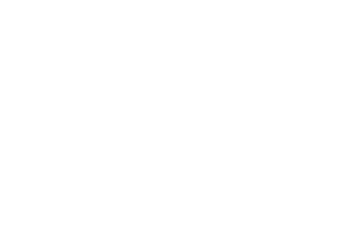

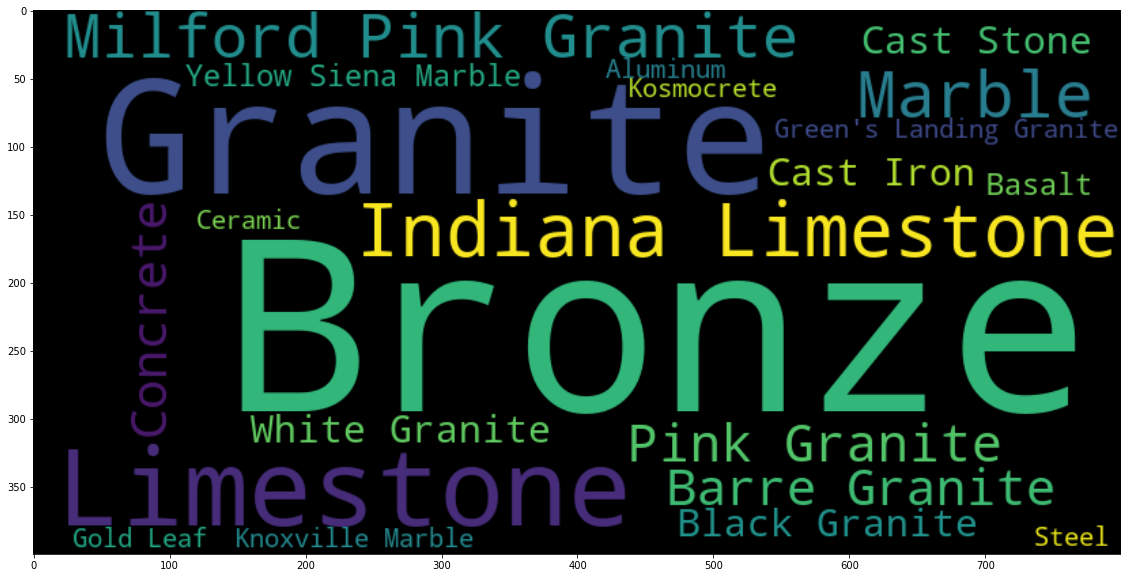

In [241]:
#plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud2, interpolation='bilinear')

In [45]:
material_list = material_list.apply(make_consistent)

In [46]:
material_list

0     Bronze (green patina), knoxville marble (rough...
1                                                Bronze
2                                             Limestone
3                                             Limestone
4                                            Kosmocrete
5                                             Limestone
6                                                Bronze
7                                             Limestone
8                                                Bronze
9                                 Bronze, barre granite
10                                               Bronze
11                                      Granite, bronze
12                            Bronze, indiana limestone
13            Armatures--steel, aluminum (color-coated)
14                                               Marble
15    Columns and plinths--granite; tripods and bowl...
16    Figures--bronze; boulder--basalt; play surface...
17    Figure, eagle, and medallions--bronze; ped

#### Monuments Word Cloud

In [6]:
def toBlob(text):
    return TextBlob(text)

def make_consistent(col_name):
    col_name = col_name.capitalize()
    col_name = col_name.strip()
    #col_name = col_name.replace('Hard-working', 'Hardworking')
    return col_name

In [36]:
# Make Data Consistent
materials_col = materials_col.apply(make_consistent)
#personality['personality_words'] = personality['personality_words'].apply(make_consistent)

In [26]:
wordcloud2 = WordCloud().generate(' '.join(materials_col))

In [27]:
wordcloud2

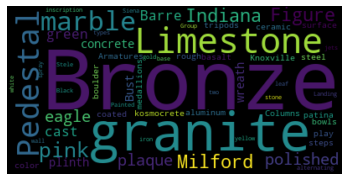

In [28]:
#wordcloud = WordCloud(width=400, height=300, random_state=20, max_font_size=120,
                      #collocations=False, color_func=lambda *args, **kwargs: "white").generate(allwords)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

### Park Events

In [72]:
events_listing = pd.read_csv(r'/Users/mansi/Downloads/NYC_Parks_Events_Listing___Event_Listing.csv')
events_location = pd.read_csv(r'/Users/mansi/Downloads/NYC_Parks_Events_Listing___Event_Locations.csv')
events_category = pd.read_csv(r'/Users/mansi/Downloads/NYC_Parks_Events_Listing___Event_Categories.csv')

In [73]:
events_listing

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,cost_free,cost_description,must_see,url,notice
0,173635,Central Park Tour: Iconic Views of Central Park,10/21/2018,11:00,12:30,Mid-park between 64th and 65th Streets. Enter ...,"<p>Take our signature tour, and let Central Pa...",Some of New York’s most iconic sights are foun...,(212) 310-6600,tours@centralparknyc.org,0,Tickets: $15 per person. Central Park Conserva...,0,central-park-tour-iconic-views-of-central-park,0
1,156947,Birding Jamaica Bay,12/23/2017,13:00,14:30,Meet inside the park at B32 Street and Beach C...,<p>New York City is home to an amazing abundan...,Our Rangers will guide you t the best wildlife...,(718) 352-1769,NaN,1,NaN,1,birding-jamaica-bay,0
2,120964,Halloweenie Lunch,10/30/2015,12:00,14:00,NaN,"<p>Enjoy a Halloween-themed lunch, music and d...","Enjoy a Halloween-themed lunch, music and danc...",(718) 829-0156,NaN,0,Recreation Center membership is required.,0,halloweenie-lunch,0
3,162675,Summer on the Hudson: Locomotive Lawn Live,06/07/2018,10:30,11:15,NaN,"<p><a href=""http://moosikikids.com/index.htm"">...",Moosiki Kids Musical Storytime fosters a love ...,311,summeronthehudson@gmail.com,1,NaN,0,summer-on-the-hudson-locomotive-lawn-live,0
4,163976,Stargazing,04/17/2018,18:45,21:30,NaN,<p>Head to the High Line each Tuesday night fo...,Peer through high-powered telescopes provided ...,(212)206-9922,info@thehighline.org,1,NaN,0,stargazing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74875,91553,It's My Park Day at Travers Park,05/03/2014,10:00,13:00,NaN,"On It&#39;s My Park Day, May 3, 2014, voluntee...",Volunteer with the Friends of the Travers Park...,(718) 565-5344,info@jhbg.org,1,NaN,0,its-my-park-day-at-travers-park,0
74876,90891,Bryant Park Board Game Social,07/17/2014,12:00,15:00,NaN,Join us at our all new weekly Game Socials to ...,Join us at our all new weekly Game Socials to ...,(212) 768-4242,bpc@urbanmgt.com,1,NaN,0,bryant-park-board-game-social,0
74877,140546,Winter Trees Workshop,02/24/2017,13:00,14:30,NaN,"<p>Trees provide us with wood, food, and paper...",Explore and learn about our winter trees and t...,(718) 886-3800,Jbrey@queensbotanical.org,0,$6,0,winter-trees-workshop,0
74878,125660,Kids Week Brooklyn: Coastal Exploration,04/26/2016,13:00,14:30,NaN,<p>School is out! Get outside and get excited....,Indulge your curiosity of marine life and get ...,(718) 421-2021,NaN,1,NaN,0,kids-week-brooklyn-coastal-exploration,0


In [74]:
events_listing.merge(events_location, on=['event_id'], how='left')

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,url,notice,name,park_id,lat,long,address,zip,borough,accessible
0,173635,Central Park Tour: Iconic Views of Central Park,10/21/2018,11:00,12:30,Mid-park between 64th and 65th Streets. Enter ...,"<p>Take our signature tour, and let Central Pa...",Some of New York’s most iconic sights are foun...,(212) 310-6600,tours@centralparknyc.org,...,central-park-tour-iconic-views-of-central-park,0,Dairy Visitor Center & Gift Shop,M010,40.769109,-73.973615,NaN,NaN,M,1.0
1,156947,Birding Jamaica Bay,12/23/2017,13:00,14:30,Meet inside the park at B32 Street and Beach C...,<p>New York City is home to an amazing abundan...,Our Rangers will guide you t the best wildlife...,(718) 352-1769,NaN,...,birding-jamaica-bay,0,Bay 32nd Street and Beach Channel Drive,Q007,40.598701,-73.766197,NaN,11691.0,Q,NaN
2,120964,Halloweenie Lunch,10/30/2015,12:00,14:00,NaN,"<p>Enjoy a Halloween-themed lunch, music and d...","Enjoy a Halloween-themed lunch, music and danc...",(718) 829-0156,NaN,...,halloweenie-lunch,0,Owen Dolen Recreation Center,X016,40.839401,-73.843597,2551 Westchester Square,10461.0,X,NaN
3,162675,Summer on the Hudson: Locomotive Lawn Live,06/07/2018,10:30,11:15,NaN,"<p><a href=""http://moosikikids.com/index.htm"">...",Moosiki Kids Musical Storytime fosters a love ...,311,summeronthehudson@gmail.com,...,summer-on-the-hudson-locomotive-lawn-live,0,Locomotive Lawn,M353,40.774720,-73.992537,NaN,NaN,M,NaN
4,163976,Stargazing,04/17/2018,18:45,21:30,NaN,<p>Head to the High Line each Tuesday night fo...,Peer through high-powered telescopes provided ...,(212)206-9922,info@thehighline.org,...,stargazing,0,On the High Line at 14th Street,M360,40.741779,-74.007727,NaN,NaN,M,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76521,91553,It's My Park Day at Travers Park,05/03/2014,10:00,13:00,NaN,"On It&#39;s My Park Day, May 3, 2014, voluntee...",Volunteer with the Friends of the Travers Park...,(718) 565-5344,info@jhbg.org,...,its-my-park-day-at-travers-park,0,78th Street Entrance,Q303,40.754501,-73.889000,NaN,NaN,Q,NaN
76522,90891,Bryant Park Board Game Social,07/17/2014,12:00,15:00,NaN,Join us at our all new weekly Game Socials to ...,Join us at our all new weekly Game Socials to ...,(212) 768-4242,bpc@urbanmgt.com,...,bryant-park-board-game-social,0,40th Street Plaza,M008,40.753201,-73.984001,NaN,NaN,M,1.0
76523,140546,Winter Trees Workshop,02/24/2017,13:00,14:30,NaN,"<p>Trees provide us with wood, food, and paper...",Explore and learn about our winter trees and t...,(718) 886-3800,Jbrey@queensbotanical.org,...,winter-trees-workshop,0,Queens Botanical Garden,NaN,40.751499,-73.826202,43-50 Main Street,11355.0,Q,NaN
76524,125660,Kids Week Brooklyn: Coastal Exploration,04/26/2016,13:00,14:30,NaN,<p>School is out! Get outside and get excited....,Indulge your curiosity of marine life and get ...,(718) 421-2021,NaN,...,kids-week-brooklyn-coastal-exploration,0,Salt Marsh Nature Center,B057,40.604698,-73.929802,East 33rd Street and Avenue U,11234.0,B,1.0


In [ ]:
dfs = [df1, df2, df3, ...]
nan_value = 0

# solution 1 (fast)
result_1 = pd.concat(dfs, join='outer', axis=1).fillna(nan_value)